## Práctica 5
## Regresión Polinomial
## Vianey Maravilla Pérez

**Especificaciones:**

- Cargue el dataset "breast-cancer.csv". En este dataset la columna 'diagnosis' es el targer y puede tomas los valores M que indica que el cáncer es maligno y B que indica que es benigno. El resto de las columnas son las características.

- Separe el dataset en un conjunto de entrenamiento (90%) y un conjunto de prueba (10%) utilizando 'random_state=0'

- Utilizando el conjunto de entrenamiento entrene un modelo con regresión logística 

- Utilice el modelo entrenado para clasificar las instancias del conjunto de prueba (10%)

**Evidencias**

- Código fuente

- Matriz de confusión

- Exactitud obtenida por el modelo en el conjunto de pruebas


In [1]:
# Importamos las librerias necesarias para esta práctica

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
# Creamos un dataframe con el archivo que vamos a trabajar

dataframe = pd.read_csv('breast-cancer.csv', sep = ',', engine = 'python')

In [3]:
# Visualizamos el dataframe para ver como trabajar con el archivo

dataframe.head(20) # En este caso con 'head(20), nos devolverá las primeras 20 filas 


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


In [4]:
# Indicación de etiquetas al nombre de las columnas

etiquetas = 'diagnosis'

In [5]:
# Ahora pasamos a un corpus sin etiquetas

X = dataframe.drop(etiquetas, axis = 1). values

# Con drop nos devuelve una copia de la serie de datos tras eliminarlas etiquetas que especificamos como 'diagnosis'"

# Ahora vamos a poner como Y a las etiquetas M y B para posteriormente poder visualizarlo, por lo que nos servirá más adelante

y = dataframe[etiquetas].values

In [6]:
# Visualizamos el corpus sin etiquetas

X

array([[8.4230200e+05, 1.7990000e+01, 1.0380000e+01, ..., 2.6540000e-01,
        4.6010000e-01, 1.1890000e-01],
       [8.4251700e+05, 2.0570000e+01, 1.7770000e+01, ..., 1.8600000e-01,
        2.7500000e-01, 8.9020000e-02],
       [8.4300903e+07, 1.9690000e+01, 2.1250000e+01, ..., 2.4300000e-01,
        3.6130000e-01, 8.7580000e-02],
       ...,
       [9.2695400e+05, 1.6600000e+01, 2.8080000e+01, ..., 1.4180000e-01,
        2.2180000e-01, 7.8200000e-02],
       [9.2724100e+05, 2.0600000e+01, 2.9330000e+01, ..., 2.6500000e-01,
        4.0870000e-01, 1.2400000e-01],
       [9.2751000e+04, 7.7600000e+00, 2.4540000e+01, ..., 0.0000000e+00,
        2.8710000e-01, 7.0390000e-02]])

In [7]:
# Visualizamos las etiquetas 

y

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

In [8]:
# Ahora, se obtendrá como en las anteriores prácticas, el conjunto de prueba y el conjunto de entrenamiento
# Tomando en cuenta random_state = 0

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle = True, random_state = 0)

In [9]:
# Obtención del modelo de la Regresión Logistica

modelclf = LogisticRegression ()
modelclf.fit(x_train, y_train)

LogisticRegression()

In [10]:
# Obtenemos la clase de predicción/ predicha

predic_y = modelclf.predict(x_test)

In [11]:
# Obtenemos la Clase Real

print('Clase Real\n', y_test)

Clase Real
 ['M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M'
 'M' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'M'
 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'B'
 'B' 'B' 'B']


In [12]:
# Obtenemos la Clase de predicción / predicha

print('Clase de Predicción / predicha\n', predic_y)

Clase de Predicción / predicha
 ['B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B']


In [13]:
# Ahora obtendremos la Matriz de Confusión

print('Matriz de Confusión\n')
print(confusion_matrix(y_test, predic_y))

Matriz de Confusión

[[35  0]
 [22  0]]


In [14]:
# Presición 
print('Acuracy\n')
print('Porcentaje de instancias predichas correctamente:', round(accuracy_score(y_test, predic_y) * 100, 2), '%')
print('Número de instancias predichas correctamente:', accuracy_score(y_test, predic_y, normalize = False), '')

Acuracy

Porcentaje de instancias predichas correctamente: 61.4 %
Número de instancias predichas correctamente: 35 


In [15]:
# Obtenemos el gráfico de la matriz
Matrix = confusion_matrix(y_test, predic_y, labels = modelclf.classes_)
dp = ConfusionMatrixDisplay(confusion_matrix = Matrix, display_labels = modelclf.classes_)

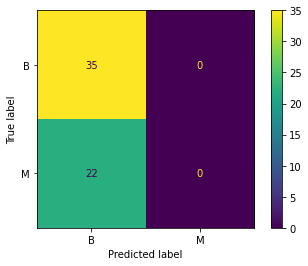

In [16]:
# Visualizamos el gráfico 

dp.plot()

In [17]:
# Ahora se harán las probabilidades de pertenecer a una clase M o B

predic_probabilidad = modelclf.predict_proba(x_test)

In [18]:
# Visualización de las probabilidades

print('Probabilidades de pertenecer a una clase:\n', predic_probabilidad)

Probabilidades de pertenecer a una clase:
 [[0.50005645 0.49994355]
 [0.50056171 0.49943829]
 [0.50005606 0.49994394]
 [0.500055   0.499945  ]
 [0.5000527  0.4999473 ]
 [0.50005648 0.49994352]
 [0.50000556 0.49999444]
 [0.5000551  0.4999449 ]
 [0.50005678 0.49994322]
 [0.5000554  0.4999446 ]
 [0.50005588 0.49994412]
 [0.50005311 0.49994689]
 [0.50005582 0.49994418]
 [0.50053698 0.49946302]
 [0.50005311 0.49994689]
 [0.50000537 0.49999463]
 [0.50005513 0.49994487]
 [0.50543705 0.49456295]
 [0.50000557 0.49999443]
 [0.50005455 0.49994545]
 [0.50005262 0.49994738]
 [0.50054938 0.49945062]
 [0.50005625 0.49994375]
 [0.5005431  0.4994569 ]
 [0.50055557 0.49944443]
 [0.50005576 0.49994424]
 [0.5000537  0.4999463 ]
 [0.50521894 0.49478106]
 [0.50055546 0.49944454]
 [0.50005533 0.49994467]
 [0.50005385 0.49994615]
 [0.50005194 0.49994806]
 [0.50056178 0.49943822]
 [0.5053461  0.4946539 ]
 [0.50005357 0.49994643]
 [0.50529629 0.49470371]
 [0.50054327 0.49945673]
 [0.5000534  0.4999466 ]
 [0.500